In [2]:
#hw1 TSP one redo
First_data_set = [[0, 633, 257,  91 ,412 ,150 , 80 ,134 ,259, 505 ,353 ,324 , 70 ,211 ,268 ,246, 121],
[633 ,  0 ,390 ,661 ,227, 488 ,572 ,530, 555, 289 ,282 ,638, 567, 466 ,420 ,745, 518],
[257, 390,   0 ,228, 169 ,112, 196, 154, 372, 262, 110, 437, 191,  74 , 53, 472, 142],
[91 ,661, 228 ,  0, 383 ,120 , 77 ,105, 175 ,476 ,324 ,240,  27, 182, 239 ,237,  84],
[412 ,227 ,169 ,383  , 0, 267, 351, 309, 338, 196,  61 ,421, 346, 243, 199 ,528, 297],
[150 ,488 ,112 ,120, 267 ,  0,  63,  34, 264, 360, 208 ,329 , 83, 105 ,123, 364 , 35],
[80 ,572 ,196 , 77, 351,  63,   0 , 29, 232, 444, 292, 297 , 47, 150 ,207, 332 , 29],
[134 ,530 ,154, 105, 309 , 34,  29,   0, 249, 402, 250 ,314 , 68, 108 ,165 ,349 , 36],
[259 ,555 ,372, 175, 338, 264, 232, 249,   0, 495 ,352 , 95, 189, 326 ,383, 202, 236],
[505 ,289 ,262, 476, 196,360, 444, 402, 495 ,  0, 154, 578 ,439, 336, 240,685, 390],
[353 ,282 ,110 ,324 , 61, 208, 292, 250, 352, 154 ,  0 ,435 ,287, 184, 140, 542, 238],
[324 ,638 ,437 ,240 ,421, 329, 297, 314,  95, 578, 435 , 0 ,254 ,391 ,448, 157 ,301],
[ 70 ,567 ,191 , 27 ,346 , 83,  47,  68, 189, 439 ,287 ,254 ,  0 ,145, 202, 289,  55],
[211 ,466  ,74, 182 ,243, 105, 150, 108 ,326 ,336 ,184 ,391, 145 ,  0,  57, 426 , 96],
[268 ,420 , 53, 239 ,199, 123, 207, 165, 383 ,240 ,140 ,448 ,202 , 57 ,  0, 483, 153],
[246 ,745 ,472, 237 ,528, 364, 332, 349, 202 ,685 ,542 ,157 ,289, 426,483 ,  0, 336],
[121 ,518 ,142 , 84 ,297,  35,  29 , 36 ,236 ,390, 238 ,301 , 55 , 96 ,153 ,336 ,  0 ] ] 

import random
import numpy as np

def readWeight(Traversalorder, Adjencymatrix):
    weight = 0
    for i in range(len(Traversalorder)-1):
        current = Traversalorder[i]
        currentplus1 = Traversalorder[i+1]
        weight += Adjencymatrix[current][currentplus1]
    return weight
    
def constructNaiveConnected(Adjencymatrix):
    Resultarray = []
    for i in range(len(Adjencymatrix)):
        Resultarray.append(i)
    Resultarray.append(0)
    return Resultarray

def constructPath(Adjencymatrix):
    Array = list(range(1, len(Adjencymatrix)))
    random.shuffle(Array)
    return  [0] + Array + [0]




In [3]:
def readfile(file):
    filename = file
    f = open(filename,'r')
    
    Res_arr = []
    
    
    for line in f:
        Row_arr = []
        temp = line.split()
        for i in temp:
            Row_arr.append(int(i))
        Res_arr.append(Row_arr)
    return Res_arr

Third_data_set = readfile("people.sc.fsu.edu_~jburkardt_datasets_tsp_att48_d.txt")

In [4]:
Sec_data_set = [
[     0  ,83 , 93 ,129 ,133, 139 ,151 ,169, 135, 114, 110 , 98,  99 , 95,  81, 152, 159, 181 ,172, 185, 147 ,157 ,185 ,220, 127, 181],
[ 83   ,0 , 40 , 53  ,62 , 64 , 91 ,116 , 93 , 84 , 95 , 98,  89 , 68,  67, 127, 156, 175, 152, 165 ,160, 180 ,223 ,268, 179 ,197],
[93  ,40  , 0 , 42  ,42 , 49 , 59  ,81 , 54 , 44 , 58 , 64 , 54 , 31 , 36 , 86, 117, 135 ,112, 125 ,124, 147, 193, 241, 157, 161],
[129  ,53 , 42 ,  0 , 11 , 11 , 46  ,72 , 65 , 70 , 88 ,100 , 89  ,66 , 76, 102 ,142, 156, 127 ,139 ,155, 180, 228 ,278 ,197, 190],
[133  ,62 , 42 , 11  , 0  , 9 , 35  ,61 , 55 , 62 , 82 , 95 , 84 , 62 , 74  ,93 ,133 ,146 ,117, 128, 148, 173 ,222, 272, 194, 182],
[139  ,64 , 49 , 11  , 9  , 0 , 39  ,65 , 63 , 71 , 90 ,103, 92 , 71,  82 ,100, 141, 153 ,124, 135, 156, 181 ,230 ,280, 202 ,190],
[151  ,91 , 59 , 46 , 35 , 39  , 0  ,26 , 34 , 52,  71 , 88 , 77 , 63 , 78,  66 ,110 ,119,  88 , 98 ,130 ,156, 206, 257, 188, 160],
[169 ,116 , 81 , 72 , 61 , 65 , 26  , 0 , 37 , 59 , 75 , 92 , 83 , 76 , 91 , 54 , 98, 103 , 70 , 78, 122, 148, 198, 250, 188, 148],
[135  ,93 , 54 , 65 , 55 , 63 , 34 , 37 ,  0 , 22 , 39 , 56 , 47 , 40 , 55 , 37 , 78 , 91,  62,  74,  96 ,122 ,172, 223, 155, 128],
[114  ,84 , 44  ,70 , 62 , 71 , 52 , 59 , 22 ,  0 , 20 , 36 , 26 , 20 , 34 , 43 , 74,  91 , 68,  82,  86, 111, 160, 210, 136, 121],
[110  ,95 , 58 , 88 , 82 , 90 , 71 , 75 , 39,20 ,  0 , 18 , 11 , 27 , 32 , 42 , 61,  80 , 64 , 77,  68,  92 ,140 ,190 ,116, 103],
[98  ,98 , 64 ,100 , 95, 103 , 88  ,92 , 56 , 36,  18,   0  ,11,  34 , 31,  56 , 63  ,85 , 75,  87 , 62,  83, 129 ,178, 100 , 99],
[99  ,89 , 54  ,89 , 84 , 92 , 77,  83 , 47 , 26  ,11 , 11 ,  0,  23 , 24 , 53 , 68 , 89,  74 , 87 , 71  ,93 ,140, 189 ,111, 107],
[95  ,68 , 31 , 66 , 62, 71 , 63 , 76 , 40 , 20 , 27,  34 , 23,   0 , 15,  62 , 87 ,106 , 87, 100 , 93 ,116 ,163, 212, 132 ,130],
[81  ,67 , 36  ,76 , 74 , 82 , 78 , 91 , 55,  34 , 32,  31 , 24 , 15 ,  0 , 73 , 92, 112 , 96, 109  ,93, 113, 158, 205 ,122 ,130],
[152 ,127 , 86 ,102 , 93 ,100 , 66 , 54 , 37 , 43 , 42 , 56 , 53 , 62 , 73 ,  0 , 44 , 54 , 26 , 39 , 68 , 94, 144, 196 ,139 , 95],
[159 ,156 ,117 ,142 ,133, 141, 110 , 98 , 78 , 74 , 61,  63 , 68 , 87 , 92 , 44  , 0 , 22 , 34 , 38 , 30  ,53, 102, 154, 109 , 51],
[181 ,175 ,135 ,156, 146, 153 ,119, 103 , 91 , 91,  80,  85 , 89, 106 ,112 , 54 , 22  , 0 , 33  ,29 , 46 , 64 ,107 ,157, 125,  51],
[172 ,152 ,112 ,127, 117, 124 , 88 , 70 , 62 , 68 , 64,  75 , 74 , 87 , 96 , 26 , 34 , 33  , 0  ,13 , 63,  87, 135, 186, 141 , 81],
[185, 165, 125 ,139, 128, 135 , 98 , 78 , 74 , 82,  77,  87 , 87 ,100, 109 , 39  ,38 , 29 , 13  , 0  ,68 , 90, 136 ,186, 148,  79],
[147, 160, 124 ,155 ,148, 156 ,130, 122 , 96 , 86 , 68,  62 , 71,  93  ,93  ,68 , 30  ,46 , 63 , 68 ,  0 , 26 , 77 ,128 , 80  ,37],
[157 ,180, 147, 180, 173, 181, 156, 148, 122 ,111 , 92 , 83 , 93, 116, 113 , 94  ,53 , 64,  87 , 90 , 26,   0 , 50 ,102 , 65,  27],
[185 ,223, 193, 228, 222, 230 ,206,198, 172, 160 ,140, 129, 140, 163, 158, 144 ,102 ,107 ,135, 136 , 77 , 50  , 0 , 51 , 64 , 58],
[220 ,268, 241, 278 ,272, 280, 257, 250,223, 210, 190 ,178 ,189 ,212, 205 ,196, 154 ,157, 186 ,186, 128, 102 , 51 ,  0 , 93, 107],
[ 127 ,179, 157, 197, 194, 202, 188 ,188, 155 ,136 ,116 ,100,111, 132 ,122 ,139, 109, 125, 141 ,148 , 80 , 65 , 64 , 93  , 0 , 90],
[ 181, 197, 161 ,190 ,182, 190, 160 ,148 ,128, 121 ,103,  99 ,107 ,130 ,130 , 95  ,51 , 51 , 81  ,79 , 37 , 27,  58, 107,  90  , 0]
]

In [5]:
import matplotlib.pyplot as plt
import copy
connectedT1 = constructNaiveConnected(First_data_set)


def edgeSwappingAlgo(MAX_ITERATION, Path, Data_set):
    bestweight = readWeight(Path, Data_set)
    newweight =  readWeight(Path, Data_set)
    count = 0;
    Result_arr = []
    
    while count < MAX_ITERATION:
        
        Result_arr.append(bestweight)
        
        i = random.randint(1, len(Path) - 2)
        j =  random.randint(1, len(Path) - 2)
        
        while(i == j or abs(i - j) < 1):
            j =  random.randint(1, len(Path) - 2)   
        if i > j:
            temp = i
            i = j
            j = temp
            
        tempPath = copy.deepcopy(Path)
        tempPath = tempPath[0:i] + tempPath[i:j+1][::-1] + tempPath[j+1:]
            
        newweight = readWeight(tempPath , Data_set)
        if(newweight < bestweight):
            Path = tempPath 
            bestweight = newweight
        count = count + 1
        
        #print(bestweight)
        
    return Result_arr 

def swapPointAlgo(MAX_ITERATION, Path, Data_set):
    Result_arr = []
    currentBest = readWeight(Path, Data_set) 
    currentweight = readWeight(Path, Data_set) 
    
    for i in range(MAX_ITERATION):
        Result_arr.append(currentBest)
        val1= random.randint(1, len(Path)-2)
        val2= random.randint(1, len(Path)-2)
        while val1 == val2:
            val2= random.randint(1, len(Path)-2)
            
        temp = Path[val1] 
        Path[val1] = Path[val2] 
        Path[val2] = temp
        currentweight = readWeight(Path, Data_set)
        if currentweight > currentBest:
            temp = Path[val1] 
            Path[val1] = Path[val2] 
            Path[val2] = temp
            currentweight = readWeight(Path, Data_set)
        else:
            currentBest = currentweight
        #print(currentBest)
        
    return Result_arr

def randomAlgo(MAX_ITERATION, Path, Data_set):
    Result_arr = []
    currentBest = readWeight(Path, Data_set)
    
    for i in range(MAX_ITERATION):
        Result_arr.append(currentBest)
        middle = Path[1: len(Path)-1]
        random.shuffle(middle)
        Newpath = Path[0:1] + middle +  Path[len(Path)-1:]

        if readWeight(Newpath, Data_set) < currentBest:
            currentBest = readWeight(Newpath, Data_set)
            Path = Newpath
    return Result_arr

def getAvg(ListofList): 
    ReturnList = []
    for iteration in range(len(ListofList[0])):
        total = 0
        for trial in range(len(ListofList)):
            total += ListofList[trial][iteration]
        ReturnList.append(total/ len(ListofList))
    return ReturnList
def getMinimum(ListofList):
    minnest = 99999999
    for i in range(len(ListofList)):
        if ListofList[i][len(ListofList[0])-1] < minnest:
            minnest = ListofList[i][len(ListofList[0])-1]
            
    return minnest

        

def runSimulation(trials, MAX_ITERATION, Data_set, Key_word):

    IndexList = range(MAX_ITERATION)
    EdgeswapTotal = []
    SwapPointTotal = [] 
    RandomTotal = []
    
    for trial in range(trials):
        edgelist = []
        swaplist = []
        randomlist = []
        random.seed(trial)
        
        path = constructPath(Data_set)
        path2 = path.copy()
        path3 = path.copy()

        EdgeswapTotal.append( edgeSwappingAlgo(MAX_ITERATION, path, Data_set))
        SwapPointTotal.append( swapPointAlgo(MAX_ITERATION, path2, Data_set))
        RandomTotal.append(randomAlgo(MAX_ITERATION, path3, Data_set))
        
    EdgeswapAvg = getAvg(EdgeswapTotal)
    SwappointAvg = getAvg( SwapPointTotal)
    RandomAvg = getAvg(  RandomTotal)
    
    print("Global min for Edgeswap",getMinimum(EdgeswapTotal))
    print("Global min for Swappoint",getMinimum(SwapPointTotal))
    print("Global min for Random", getMinimum(RandomTotal))
    
    plt.plot(IndexList, EdgeswapAvg, label = Key_word + ", Edgeswap")
    plt.plot(IndexList, SwappointAvg, label =  Key_word+ ", Swappoint")
    plt.plot(IndexList, RandomAvg, label =  Key_word+ ", Random")
    plt.ylabel('miles')
    plt.xlabel('iteration')
    plt.legend()
    plt.show()



            

Global min for Edgeswap 2088
Global min for Swappoint 2090
Global min for Random 2920


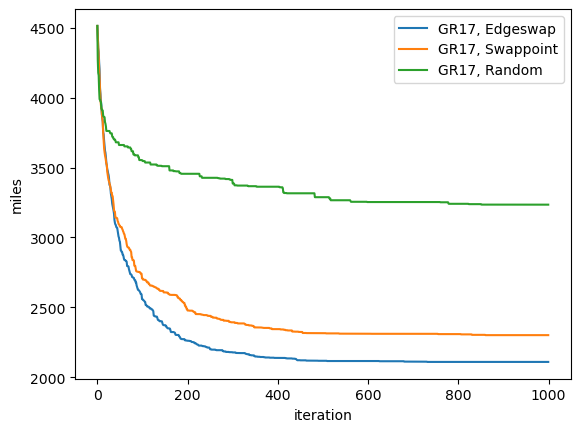

In [6]:
#edgeSwappingAlgo(10,constructPath(First_data_set ), First_data_set )
runSimulation(20,1000, First_data_set, "GR17")


Global min for Edgeswap 937
Global min for Swappoint 1005
Global min for Random 1689


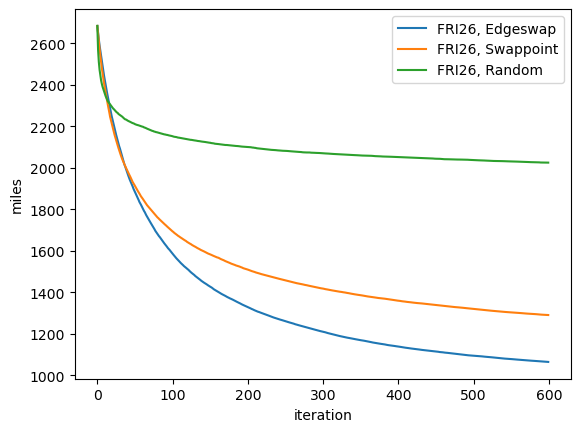

In [68]:
runSimulation(1000,600, Sec_data_set, "FRI26")

Global min for Edgeswap 37395
Global min for Swappoint 48548
Global min for Random 102736


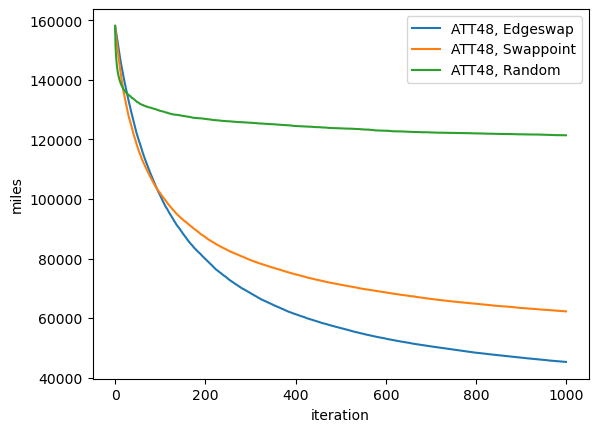

In [69]:
runSimulation(500,1000, Third_data_set, "ATT48")

Global min for Edgeswap 2085
Global min for Swappoint 2090
Global min for Random 2448


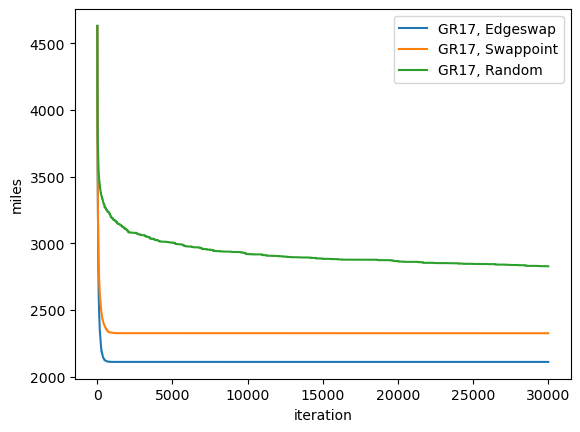

In [67]:
runSimulation(100,30000, First_data_set, "GR17")

Global min for Edgeswap 937
Global min for Swappoint 972
Global min for Random 1654


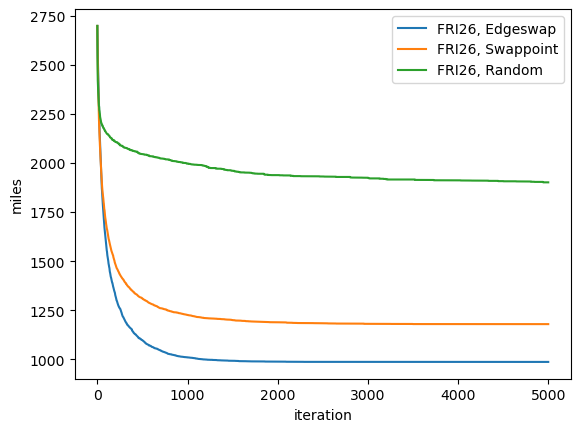

In [13]:
runSimulation(100,5000, Sec_data_set, "FRI26")

Global min for Edgeswap 33614
Global min for Swappoint 39132
Global min for Random 97173


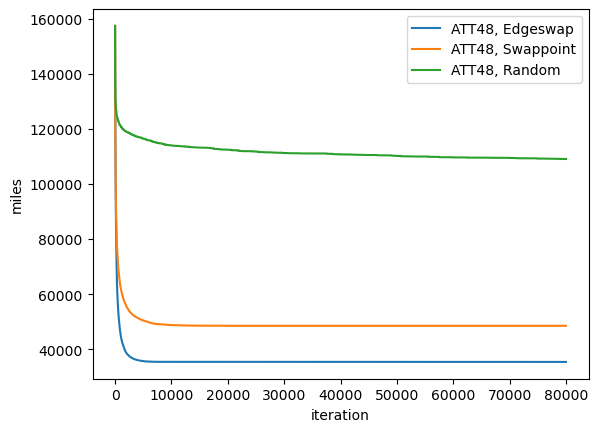

In [73]:
runSimulation(100,80000, Third_data_set, "ATT48")